In [141]:
import numpy as np
import pandas as pd

In [142]:
df = pd.read_excel("Stock_Prices_Data.xlsx")

In [51]:
df.shape

(5217, 4190)

In [52]:
df.isnull().sum(axis=1)

0          1
1          1
2          1
3          1
4          0
        ... 
5212    1661
5213       0
5214    4189
5215       0
5216     994
Length: 5217, dtype: int64

In [53]:
missing_percentage_row = df.isnull().sum(axis=1)/len(df)*100
missing_percentage_row

0        0.019168
1        0.019168
2        0.019168
3        0.019168
4        0.000000
          ...    
5212    31.838221
5213     0.000000
5214    80.295189
5215     0.000000
5216    19.053096
Length: 5217, dtype: float64

In [54]:
# # its more than 50%, so dropping it

# data_cleaned = df.dropna()

# # Output the shape of the cleaned dataset
# print("Shape of cleaned dataset after dropping columns with high missing values:", data_cleaned.shape)

# data_cleaned.head(10)


In [55]:
data_cleaned = df[missing_percentage_row <= 50]
data_cleaned.shape

(1414, 4190)

In [56]:
data_cleaned.isnull().sum()

Unnamed: 0          4
CMIE Expr         789
CMIE Expr.1       792
CMIE Expr.2       789
CMIE Expr.3       792
                 ... 
CMIE Expr.4184    113
CMIE Expr.4185    132
CMIE Expr.4186    132
CMIE Expr.4187    133
CMIE Expr.4188    132
Length: 4190, dtype: int64

In [57]:
missing_percentage_col = data_cleaned.isnull().sum(axis=1)/len(df)*100
missing_percentage_col

0        0.019168
1        0.019168
2        0.019168
3        0.019168
4        0.000000
          ...    
5209    15.737014
5212    31.838221
5213     0.000000
5215     0.000000
5216    19.053096
Length: 1414, dtype: float64

In [58]:
# Drop columns with missing values above 50%
high_missing_cols = missing_percentage_col[missing_percentage_col > 50]
data_cleaned = data_cleaned.drop(columns=high_missing_cols.index)

# Output the shape of the cleaned dataset
print("Shape of cleaned dataset after dropping columns with high missing values:", data_cleaned.shape)

Shape of cleaned dataset after dropping columns with high missing values: (1414, 4190)


In [59]:
# Check for duplicate rows
duplicate_rows = data_cleaned.duplicated()

# Output the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())


Number of duplicate rows: 0


In [60]:
from sklearn.preprocessing import MinMaxScaler

# Check for numerical columns
numerical_cols = data_cleaned.select_dtypes(include='number').columns

if len(numerical_cols) > 0:
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()
    
    # Apply normalization to numerical features (stock prices)
    data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])
    
    # Output the normalized dataset
    print("Normalized dataset:")
    print(data_cleaned.head())
else:
    print("No numerical columns to normalize.")


No numerical columns to normalize.


In [62]:

data_cleaned.head(10)

,Unnamed: 0,CMIE Expr,CMIE Expr.1,CMIE Expr.2,CMIE Expr.3,CMIE Expr.4,CMIE Expr.5,CMIE Expr.6,CMIE Expr.7,CMIE Expr.8,...,CMIE Expr.4179,CMIE Expr.4180,CMIE Expr.4181,CMIE Expr.4182,CMIE Expr.4183,CMIE Expr.4184,CMIE Expr.4185,CMIE Expr.4186,CMIE Expr.4187,CMIE Expr.4188
0,NaN,NSE,NSE,NSE,NSE,NSE,NSE,NSE,NSE,NSE,...,NSE,NSE,NSE,NSE,NSE,NSE,NSE,NSE,NSE,NSE
1,NaN,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,...,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ
2,NaN,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,...,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee
3,NaN,2005-04-01 00:00:00,2005-04-04 00:00:00,2005-04-05 00:00:00,2005-04-06 00:00:00,2005-04-07 00:00:00,2005-04-08 00:00:00,2005-04-11 00:00:00,2005-04-12 00:00:00,2005-04-13 00:00:00,...,2023-01-30 00:00:00,2023-01-31 00:00:00,2023-02-01 00:00:00,2023-02-02 00:00:00,2023-02-03 00:00:00,2023-02-06 00:00:00,2023-02-07 00:00:00,2023-02-08 00:00:00,2023-02-09 00:00:00,2023-02-10 00:00:00
4,Company Name,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,...,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price
5,20 Microns Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.5,82.6,82.45,81.5,80.8,79.15,79.35,77.95,77.7,77.9
7,3I Infotech Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.2,38.2,38.7,38.2,37.55,38.5,38.2,37.95,37.3,37
8,3M India Ltd.,520,537.85,540,533,549.75,528,520,520.9,521,...,22839.95,23685.85,23439.15,23200,23149,23189.15,23198,23500,23994.95,23969
9,3P Land Holdings Ltd.,4.77,4.96,4.75,NaN,4.99,NaN,5.23,NaN,5.26,...,24.35,23.75,23,21.3,20.65,19.95,18.85,18.9,19.15,20.1
13,63 Moons Technologies Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,166.8,167.85,169.6,173.3,182,204.8,189.85,207.95,202,201.75


In [65]:
df.head(10)

,Unnamed: 0,CMIE Expr,CMIE Expr.1,CMIE Expr.2,CMIE Expr.3,CMIE Expr.4,CMIE Expr.5,CMIE Expr.6,CMIE Expr.7,CMIE Expr.8,...,CMIE Expr.4179,CMIE Expr.4180,CMIE Expr.4181,CMIE Expr.4182,CMIE Expr.4183,CMIE Expr.4184,CMIE Expr.4185,CMIE Expr.4186,CMIE Expr.4187,CMIE Expr.4188
0,NaN,NSE,NSE,NSE,NSE,NSE,NSE,NSE,NSE,NSE,...,NSE,NSE,NSE,NSE,NSE,NSE,NSE,NSE,NSE,NSE
1,NaN,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,...,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ
2,NaN,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,...,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee
3,NaN,2005-04-01 00:00:00,2005-04-04 00:00:00,2005-04-05 00:00:00,2005-04-06 00:00:00,2005-04-07 00:00:00,2005-04-08 00:00:00,2005-04-11 00:00:00,2005-04-12 00:00:00,2005-04-13 00:00:00,...,2023-01-30 00:00:00,2023-01-31 00:00:00,2023-02-01 00:00:00,2023-02-02 00:00:00,2023-02-03 00:00:00,2023-02-06 00:00:00,2023-02-07 00:00:00,2023-02-08 00:00:00,2023-02-09 00:00:00,2023-02-10 00:00:00
4,Company Name,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,...,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price,Adjusted High Price
5,20 Microns Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.5,82.6,82.45,81.5,80.8,79.15,79.35,77.95,77.7,77.9
6,360 One Wam Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1865.95,1857.75,1927.95,1925,1911,1912,1949,1845.95,1851,1868.95
7,3I Infotech Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.2,38.2,38.7,38.2,37.55,38.5,38.2,37.95,37.3,37
8,3M India Ltd.,520,537.85,540,533,549.75,528,520,520.9,521,...,22839.95,23685.85,23439.15,23200,23149,23189.15,23198,23500,23994.95,23969
9,3P Land Holdings Ltd.,4.77,4.96,4.75,NaN,4.99,NaN,5.23,NaN,5.26,...,24.35,23.75,23,21.3,20.65,19.95,18.85,18.9,19.15,20.1


In [63]:
data_cleaned.shape

(1414, 4190)

In [64]:
data_cleaned.to_csv('cleaned_data.csv', index=False)

In [148]:
ds = pd.read_csv('cleaned_data.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_15408\3828680621.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

In [149]:
ds = ds.T

In [150]:
ds.head()

,0,1,2,3,4,5,6,7,8,9,...,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413
Unnamed: 0,NaN,NaN,NaN,NaN,Company Name,20 Microns Ltd.,3I Infotech Ltd.,3M India Ltd.,3P Land Holdings Ltd.,63 Moons Technologies Ltd.,...,Zenith Exports Ltd.,Zenith Steel Pipes & Inds. Ltd.,Zensar Technologies Ltd.,Zicom Electronic Security Systems Ltd.,Zodiac Clothing Co. Ltd.,Zodiac-Jrd-Mkj Ltd.,Zuari Agro Chemicals Ltd.,Zuari Industries Ltd.,Zydus Lifesciences Ltd.,Zydus Wellness Ltd.
CMIE Expr,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-01 00:00:00,Adjusted High Price,NaN,NaN,520,4.77,NaN,...,69.95,NaN,21.6,NaN,98.0,32.25,NaN,78.7,31.53,NaN
CMIE Expr.1,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-04 00:00:00,Adjusted High Price,NaN,NaN,537.85,4.96,NaN,...,73.0,NaN,22.36,NaN,97.78,35.5,NaN,85.7,32.2,NaN
CMIE Expr.2,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-05 00:00:00,Adjusted High Price,NaN,NaN,540,4.75,NaN,...,70.0,NaN,22.2,NaN,96.89,36.6,NaN,84.5,32.8,NaN
CMIE Expr.3,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-06 00:00:00,Adjusted High Price,NaN,NaN,533,NaN,NaN,...,76.0,NaN,21.88,NaN,98.87,38.45,NaN,91.9,32.07,NaN


In [151]:
missing_values_count = ds.isnull().sum()
missing_values_count

0          1
1          1
2          1
3          1
4          0
        ... 
1409     821
1410    1661
1411       0
1412       0
1413     994
Length: 1414, dtype: int64

In [167]:
data = ds[5][1:]

# Replace string 'NaN' with actual NaN
data = data.replace('NaN', np.nan)

data = pd.to_numeric(data, errors='coerce')
data

CMIE Expr           NaN
CMIE Expr.1         NaN
CMIE Expr.2         NaN
CMIE Expr.3         NaN
CMIE Expr.4         NaN
                  ...  
CMIE Expr.4184    79.15
CMIE Expr.4185    79.35
CMIE Expr.4186    77.95
CMIE Expr.4187    77.70
CMIE Expr.4188    77.90
Name: 5, Length: 4189, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


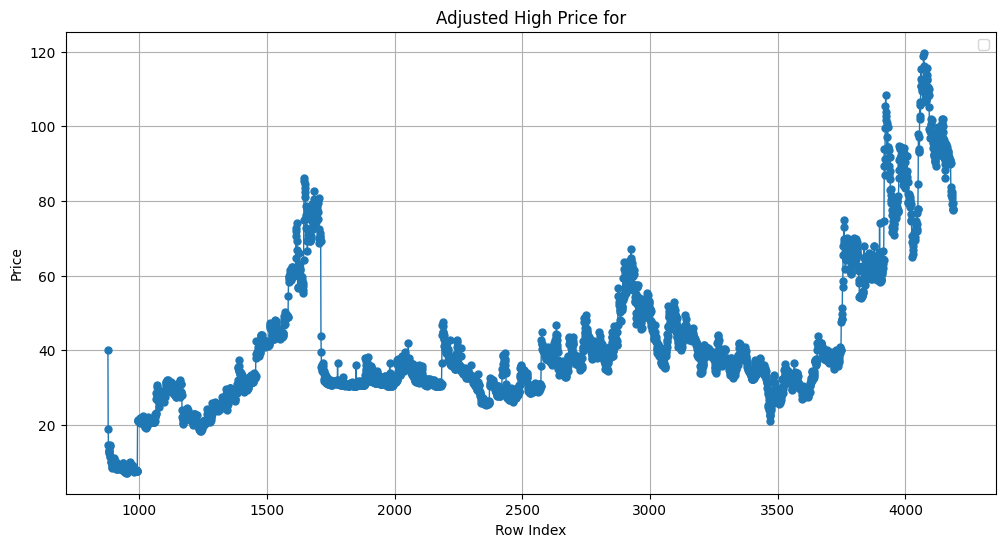

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(data)), data, marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title(f'Adjusted High Price for')
plt.xlabel('Row Index')
plt.ylabel('Price')
plt.grid(True)

plt.legend()
plt.show()

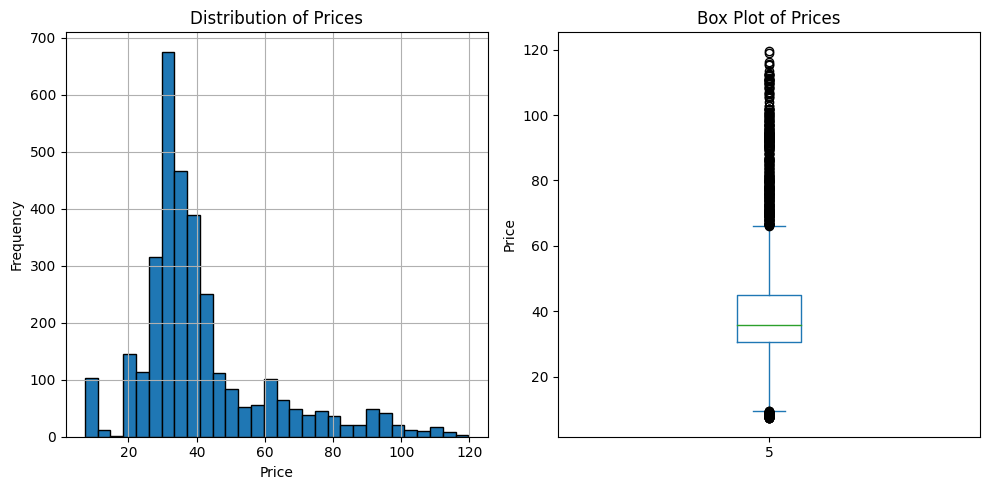

In [169]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
data.hist(bins=30, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
data.plot(kind='box')
plt.title('Box Plot of Prices')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [171]:
# right skewed so filling it with median:


# Fill missing values in column 5 with the median of column 5
ds[5].fillna(ds[5][1:].median(),inplace=True)

# Display the updated DataFrame
ds.head(20)



,0,1,2,3,4,5,6,7,8,9,...,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413
Unnamed: 0,NaN,NaN,NaN,NaN,Company Name,20 Microns Ltd.,3I Infotech Ltd.,3M India Ltd.,3P Land Holdings Ltd.,63 Moons Technologies Ltd.,...,Zenith Exports Ltd.,Zenith Steel Pipes & Inds. Ltd.,Zensar Technologies Ltd.,Zicom Electronic Security Systems Ltd.,Zodiac Clothing Co. Ltd.,Zodiac-Jrd-Mkj Ltd.,Zuari Agro Chemicals Ltd.,Zuari Industries Ltd.,Zydus Lifesciences Ltd.,Zydus Wellness Ltd.
CMIE Expr,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-01 00:00:00,Adjusted High Price,35.9,NaN,520,4.77,NaN,...,69.95,NaN,21.6,NaN,98.0,32.25,NaN,78.7,31.53,NaN
CMIE Expr.1,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-04 00:00:00,Adjusted High Price,35.9,NaN,537.85,4.96,NaN,...,73.0,NaN,22.36,NaN,97.78,35.5,NaN,85.7,32.2,NaN
CMIE Expr.2,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-05 00:00:00,Adjusted High Price,35.9,NaN,540,4.75,NaN,...,70.0,NaN,22.2,NaN,96.89,36.6,NaN,84.5,32.8,NaN
CMIE Expr.3,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-06 00:00:00,Adjusted High Price,35.9,NaN,533,NaN,NaN,...,76.0,NaN,21.88,NaN,98.87,38.45,NaN,91.9,32.07,NaN
CMIE Expr.4,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-07 00:00:00,Adjusted High Price,35.9,NaN,549.75,4.99,NaN,...,73.95,NaN,21.77,NaN,97.78,40.4,NaN,92.25,31.73,NaN
CMIE Expr.5,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-08 00:00:00,Adjusted High Price,35.9,NaN,528,NaN,NaN,...,75.2,NaN,21.27,NaN,99.53,39.5,NaN,88.25,32.13,NaN
CMIE Expr.6,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-11 00:00:00,Adjusted High Price,35.9,NaN,520,5.23,NaN,...,77.0,NaN,20.75,NaN,96.67,36.5,NaN,85.5,31.0,NaN
CMIE Expr.7,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-12 00:00:00,Adjusted High Price,35.9,NaN,520.9,NaN,NaN,...,74.45,NaN,20.86,NaN,94.44,35.85,NaN,92.7,30.66,NaN
CMIE Expr.8,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-13 00:00:00,Adjusted High Price,35.9,NaN,521,5.26,NaN,...,75.0,NaN,20.85,NaN,95.56,35.9,NaN,94.9,30.4,NaN


In [177]:
ds.shape

(4190, 1414)

In [180]:
for i in range(6,1413):
    ds[i].fillna(ds[i][1:].median(),inplace=True)

ds.head()

# # Display the updated DataFrame
# ds.head(20

,0,1,2,3,4,5,6,7,8,9,...,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413
Unnamed: 0,NaN,NaN,NaN,NaN,Company Name,20 Microns Ltd.,3I Infotech Ltd.,3M India Ltd.,3P Land Holdings Ltd.,63 Moons Technologies Ltd.,...,Zenith Exports Ltd.,Zenith Steel Pipes & Inds. Ltd.,Zensar Technologies Ltd.,Zicom Electronic Security Systems Ltd.,Zodiac Clothing Co. Ltd.,Zodiac-Jrd-Mkj Ltd.,Zuari Agro Chemicals Ltd.,Zuari Industries Ltd.,Zydus Lifesciences Ltd.,Zydus Wellness Ltd.
CMIE Expr,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-01 00:00:00,Adjusted High Price,35.9,9.05,520,4.77,214.35,...,69.95,1.3,21.6,62.65,98.0,32.25,170.0,78.7,31.53,NaN
CMIE Expr.1,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-04 00:00:00,Adjusted High Price,35.9,9.05,537.85,4.96,214.35,...,73.0,1.3,22.36,62.65,97.78,35.5,170.0,85.7,32.2,NaN
CMIE Expr.2,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-05 00:00:00,Adjusted High Price,35.9,9.05,540,4.75,214.35,...,70.0,1.3,22.2,62.65,96.89,36.6,170.0,84.5,32.8,NaN
CMIE Expr.3,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-06 00:00:00,Adjusted High Price,35.9,9.05,533,12.95,214.35,...,76.0,1.3,21.88,62.65,98.87,38.45,170.0,91.9,32.07,NaN


In [184]:
ds[1413].fillna(ds[1413][1:].median(),inplace=True)
ds.head()

,0,1,2,3,4,5,6,7,8,9,...,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413
Unnamed: 0,NaN,NaN,NaN,NaN,Company Name,20 Microns Ltd.,3I Infotech Ltd.,3M India Ltd.,3P Land Holdings Ltd.,63 Moons Technologies Ltd.,...,Zenith Exports Ltd.,Zenith Steel Pipes & Inds. Ltd.,Zensar Technologies Ltd.,Zicom Electronic Security Systems Ltd.,Zodiac Clothing Co. Ltd.,Zodiac-Jrd-Mkj Ltd.,Zuari Agro Chemicals Ltd.,Zuari Industries Ltd.,Zydus Lifesciences Ltd.,Zydus Wellness Ltd.
CMIE Expr,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-01 00:00:00,Adjusted High Price,35.9,9.05,520,4.77,214.35,...,69.95,1.3,21.6,62.65,98.0,32.25,170.0,78.7,31.53,876.0
CMIE Expr.1,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-04 00:00:00,Adjusted High Price,35.9,9.05,537.85,4.96,214.35,...,73.0,1.3,22.36,62.65,97.78,35.5,170.0,85.7,32.2,876.0
CMIE Expr.2,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-05 00:00:00,Adjusted High Price,35.9,9.05,540,4.75,214.35,...,70.0,1.3,22.2,62.65,96.89,36.6,170.0,84.5,32.8,876.0
CMIE Expr.3,NSE,Finance S / Interim SQ,Indian Rupee,2005-04-06 00:00:00,Adjusted High Price,35.9,9.05,533,12.95,214.35,...,76.0,1.3,21.88,62.65,98.87,38.45,170.0,91.9,32.07,876.0


In [185]:
ds.isnull().sum().sum()

4

In [187]:
ds.to_csv('cleaned_data_new.csv',index=False)